In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import warnings

# Set the default font to Arial
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'

# Import ages

In [12]:
def get_ages():
    
    list_dfs = []
    for species in ['mouse','macaque','human']:
        # Species annotations.
        annot = pd.read_table( f"annotations_{species}.txt" )
        list_dfs.append(annot)
    annot = pd.concat(list_dfs)
    annot = annot[['Species','Individual','Age_group','Age']].drop_duplicates().reset_index(drop=True)
    return annot


ages = get_ages()
ages


,Species,Individual,Age_group,Age
0,mouse,G133p4,Younger,0.083333
1,mouse,G133p3,Younger,0.083333
2,mouse,G131p1,Younger,0.083333
3,mouse,G133p2,Younger,0.083333
4,mouse,G133p1,Younger,0.083333
...,...,...,...,...
83,human,hs019,Older,35.000000
84,human,hs020,Younger,28.000000
85,human,hs021,Intermediate,31.000000
86,human,hs022,Intermediate,31.000000


# Histogram

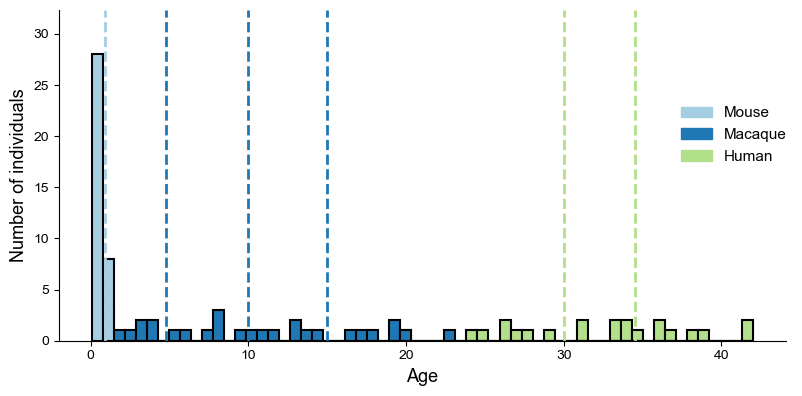

In [4]:
def histogram_ages():
    df = get_ages()
    df_ages = df[['Species','Individual','Age']].drop_duplicates()
    
    # # Change species name.
    # df_ages = change_species_name(df_ages)

    # Text size (font size) and plot style.
    #sns.set(font_scale=1.4)
    #plt.style.use('seaborn-v0_8-white')

    # Three categorical colors (greens and blues).
    custom_palette = ['#a6cee3','#1f78b4','#b2df8a']

    # Text size (font size).
    #sns.set(font_scale=1)
    #plt.style.use("bmh")
    #sns.set_style("ticks")
    
    # Histogram.
    fig = sns.displot( data = df_ages , x = "Age" , hue = "Species", bins = 60,
                                aspect = 2, height = 4,
                                  facet_kws = dict( sharey=True, sharex=False ),
                                    palette = custom_palette, alpha = 1, legend=None, linewidth=1.5
                         )
    plt.ylabel('Number of individuals', size =13)
    plt.xlabel('Age', size =13)
    percentage_raise = 1.1
    plt.ylim([ plt.ylim()[0], plt.ylim()[1]*percentage_raise ])
    #plt.ylim()

    # only one line may be specified; full height
    plt.axvline(x = 0.9, color = custom_palette[0], linestyle='--',linewidth=2) #mouse
    plt.axvline(x = 4.8, color = custom_palette[1], linestyle='--',linewidth=2) #macaque
    plt.axvline(x = 10, color = custom_palette[1], linestyle='--',linewidth=2)  #macaque
    plt.axvline(x = 15, color = custom_palette[1], linestyle='--',linewidth=2)  #macaque
    # plt.axvline(x = 32, color = custom_palette[2], linestyle='--',linewidth=2)  #human 2 categories
    plt.axvline(x = 30, color = custom_palette[2], linestyle='--',linewidth=2)  #human 3 categories
    plt.axvline(x = 34.5, color = custom_palette[2], linestyle='--',linewidth=2)  #human 3 categories

    # Change legend.
    first_patch = mpatches.Patch(color=custom_palette[0], label='Mouse')
    second_patch = mpatches.Patch(color=custom_palette[1], label='Macaque')
    third_patch = mpatches.Patch(color=custom_palette[2], label='Human')
    plt.legend(
        handles=[first_patch,second_patch,third_patch], 
        bbox_to_anchor=(1.02,0.75), title="", fontsize=11, framealpha=0.0
        )


    # Export as vectorized image.
    fig.savefig('plots/png/figureS1_histogram_ages.png', format='png', dpi=1200)
    fig.savefig('plots/pdf/figureS1_histogram_ages.pdf', format='pdf', dpi=1200)
    


histogram_ages()

In [15]:
df = get_ages()
df = df[(df['Species']=='macaque')&(df['Age_group']=='Younger')].sort_values('Age')
df['Age'].mean()

np.float64(2.4222222222222225)